lattice constant for GaAs 5.644035485025999e-10
lattice constant Al 0.2 Ga 0.8 As:  5.645764361264959e-10
lattice mismatch:  0.00030631916534653675
Shell Thickness 1.1500000000000001e-07
strain parameter 0.00019287348272594438
heavy hole bandgap 1.5172003791521609
light hole bandgap 1.5185472044636896
heavy hole bandgap 1.5172003791521609
light hole bandgap 1.5185472044636896
energy difference 0.0013468253115287432
Heavy hole binding energy 3.1192914507696696 meV
Light hole binding energy 4.892040785062518 meV
Heavy hole location 1.5140810877013913
light hole location 1.513655163678627
net total difference 0.4259240227641051


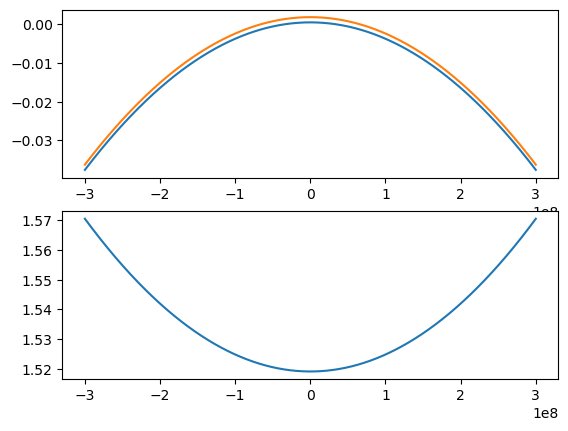

In [18]:
from scipy import constants as c 
import numpy as np
import matplotlib.pyplot as plt 
T=14#expiremental tempurature
X = 20/100 #fractional Concentration of Al 
CAlGaAs= (5.73-.53*X)*1e-6 #/C Coeffiecient of thermal expansion 
aAlGaAsRT = (5.6533+.0078*X)*1e-10 #m RT lattice constant AlGaAs
aAlGaAs=aAlGaAsRT*(1+CAlGaAs*(T-300))#m at temp lattice constant
CGaAs = (5.73)*1e-6 #/C Coeffiecient of thermal expansion
aGaAsRT = (5.6533)*1e-10 #m RTlattice constant GaAs
aGaAs = aGaAsRT*(1+CGaAs*(T-300))#m at temp lattice constant GaAs
print('lattice constant for GaAs',aGaAs)
print('lattice constant Al',X,'Ga',1-X,'As: ',aAlGaAs)
f = (aAlGaAs-aGaAs)/aGaAs #strain parameter 
#f = 5.15e-4
print('lattice mismatch: ',f)
Rc = 75e-9 #32e-9#nm core radius
hc = 30e-9 #Rc*.19#nm cap thickness 
hs = (440e-9/2-Rc-hc)#np.linspace(0,320e-9)#nm shell thickness
print('Shell Thickness',hs)
epszz = f*((hs/Rc)**2+2*(hs/Rc))/((hs/Rc)**2+(hc/Rc)**2+2*(hc/Rc)*(1+hs/Rc)+2*(hs/Rc)+1)
#strain coeffeicient for nanowires
print('strain parameter',epszz)
EGaAsG = 1.519 #gap energy 
a =-8.6 # Hydrostatic strain coeffiecient 
d =-5.2 # 
nu = .16 #Poisson ratio
Del0 = -.34 # Splitt off band energy 
H = (1-2*nu)/3 # Modified Poisson equation 
k = np.linspace(-0.3e9, 0.3e9,1000)
g1 =6.98
g2 = 2.06
mec = c.m_e*0.0665
Piezo = .00#9 #fitting Parameter for Piezo Shift
def cb(k):
    return EGaAsG -Piezo+c.hbar**2*k**2/(2*mec)/c.e
def vblh(k):
    return (-c.hbar**2*k**2*g1/(2*c.m_e)-c.hbar**2*g2*k**2/c.m_e)/c.e-(3*a*H-np.sqrt(3)/2*d*(1-H))*epszz + 3*d**2*(1-H)/(2*Del0)*epszz**2
def vbhh(k):
    return(-c.hbar**2*k**2*g1/(2*c.m_e)-c.hbar**2*g2*k**2/c.m_e)/c.e-(3*a*H+np.sqrt(3)/2*d*(1-H))*epszz


Ecblh = EGaAsG +(3*a*H-np.sqrt(3)/2*d*(1-H))*epszz - 3*d**2*(1-H)/(2*Del0)*epszz**2 #alternate band splitting formula 
Ecbhh = EGaAsG +(3*a*H+np.sqrt(3)/2*d*(1-H))*epszz #alternate band splitting formula

#Ecbhh = EGaAsG +(a*(1-2*nu)+d/np.sqrt(3)*(1-nu))*epszz 
#Ecblh = EGaAsG +(a*(1-2*nu)-d/np.sqrt(3)*(1-nu))*epszz-(d**2/Del0)*(1-nu)*(epszz**2)
print('heavy hole bandgap',Ecbhh)
print('light hole bandgap',Ecblh)
print('heavy hole bandgap',cb(0)-vbhh(0))
print('light hole bandgap',cb(0)-vblh(0))
print('energy difference',np.abs(Ecbhh-Ecblh))
me = .068*c.m_e #Conduction band electron mass
mlh = .087*c.m_e#light hole mass
mhh = .50*c.m_e#heavy hole mass
mulh = (1/me+1/mlh)**-1 #light hole reduced mass
muhh = (1/me+1/mhh)**-1 #heavy hole reduced mass
epsGaAs = 12.9 #Static relative dielectric constant 
Exhh = (mulh/c.m_e)*(1/epsGaAs**2)*13.6#heavy hole exciton binding energy
Exlh = muhh/c.m_e*(1/epsGaAs**2)*13.6#light hole exciton binding energy 
print('Heavy hole binding energy',Exhh*1000,'meV')
print('Light hole binding energy',Exlh*1000,'meV')
print('Heavy hole location',Ecbhh-Exhh)
print('light hole location', Ecblh-Exlh)
print('net total difference',1000*(np.abs(Ecbhh-Ecblh-Exhh+Exlh)) )
fig,ax = plt.subplots(2)
ax[0].plot(k,vblh(k))
ax[0].plot(k,vbhh(k))
ax[1].plot(k,cb(k))
sf = np.vstack([k,vblh(k),vbhh(k),cb(k)])
np.savetxt('E for ref.csv',sf.transpose(),delimiter=';')

In [136]:
np.abs(Exlh-Exhh/4)

0.0041122179223701

In [9]:
(0.0002813860957663907/0.567701)

0.0004956589749998515

In [10]:
0.00019606846520501045/0.37929 

0.0005169354984444895